# 0. Import libraries
## 0.1. Import public libraries

In [1]:
import copy
import glob
import importlib
import time
import os
import shutil
import sys
from importlib import reload

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
from tqdm.notebook import tqdm

#import time

## 0.2. Import our library

In [3]:
import celloracle as co
from celloracle.applications import Oracle_development_module, Oracle_systematic_analysis_helper
co.__version__

'0.12.0'

## 0.3. Plotting parameter setting

In [3]:
#plt.rcParams["font.family"] = "arial"
plt.rcParams["figure.figsize"] = [5,5]
%config InlineBackend.figure_format = 'retina'
plt.rcParams["savefig.dpi"] = 300
plt.rcParams['pdf.fonttype']=42

%matplotlib inline

## 1. Load systematic simulation results


In [4]:
# Make Oracle development module class to load data
file_path = "./Systematic_simulation_results_Paul_data.celloracle.hdf5"
dev = Oracle_development_module()
dev.set_hdf_path(path=file_path)

In [5]:
# If we use the function below, we can see information of the saved data
info = dev.get_hdf5_info()

print("Genes\n", info["gene_list"])

print("\nSimulation conditions\n", info["misc_list"])

Genes
 ['Arhgef12' 'Arid5a' 'Batf3' 'Bcl11a' 'Bdp1' 'Bhlha15' 'Bptf' 'Brf1'
 'Cbx5' 'Cebpa' 'Cebpe' 'Chd2' 'Cux1' 'Cxxc1' 'E2f4' 'Egr1' 'Elf1' 'Elk3'
 'Ets1' 'Etv6' 'Ezh2' 'Fli1' 'Foxo1' 'Foxp1' 'Gata1' 'Gata2' 'Gfi1'
 'Gfi1b' 'Herpud1' 'Hivep2' 'Hlf' 'Hnf4a' 'Hoxa5' 'Hoxa7' 'Id2' 'Ikzf2'
 'Irf1' 'Irf2' 'Irf7' 'Irf8' 'Irf9' 'Itgb2' 'Klf1' 'Klf2' 'Klf4' 'Klf6'
 'Lmo2' 'Mef2c' 'Meis1' 'Myb' 'Myc' 'Mycn' 'Nfat5' 'Nfatc2' 'Nfatc3'
 'Nfe2' 'Nfe2l2' 'Nfia' 'Nfic' 'Nfkb1' 'Nfya' 'Nr3c1' 'Pbx1' 'Phf21a'
 'Prdm5' 'Rara' 'Rel' 'Rreb1' 'Runx1' 'Runx2' 'Smarca5' 'Smarcc1'
 'Smarcc2' 'Sox13' 'Sox4' 'Sp100' 'Spi1' 'Stat1' 'Stat3' 'Stat4' 'Stat5a'
 'Tcf7' 'Tcfec' 'Ybx1' 'Zbtb1' 'Zbtb16' 'Zbtb4' 'Zbtb7a' 'Zfhx3' 'Zfp238']

Simulation conditions
 ['Granulocytes' 'Lineage_GM' 'Lineage_ME' 'Monocytes' 'Whole_cells']


## 1.1 Let's check one simulation result

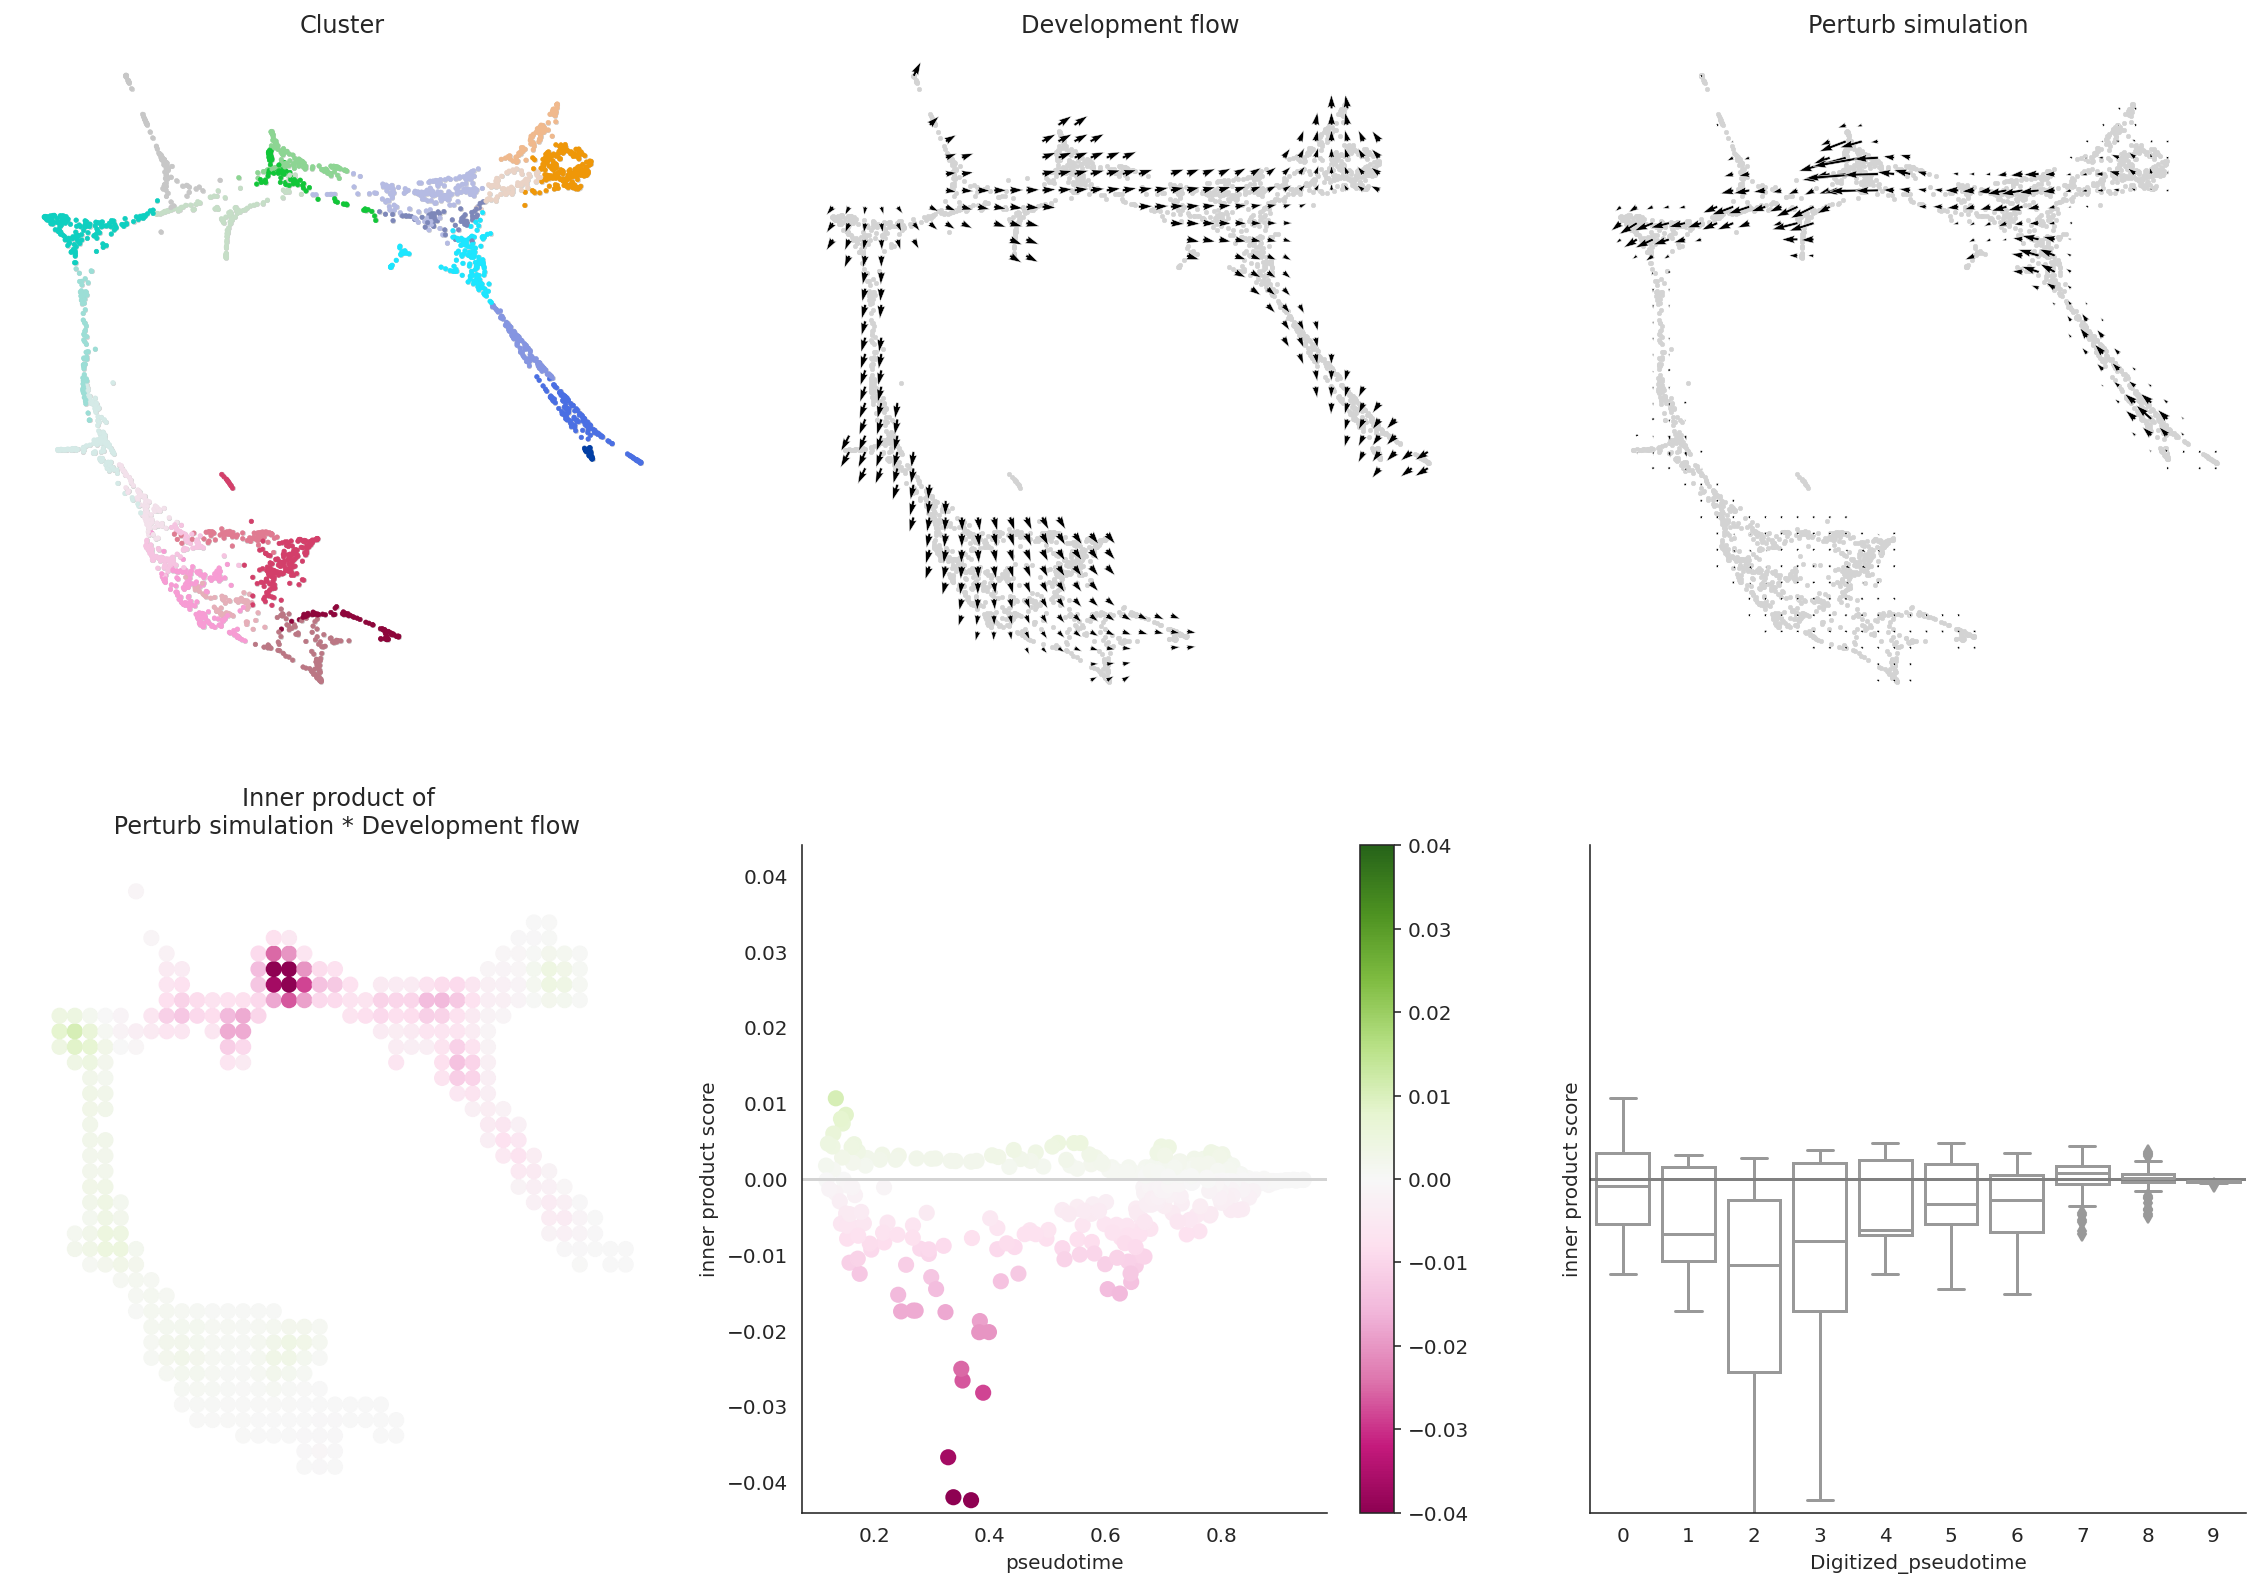

In [6]:
# Load one results
dev.load_hdf5(gene="Spi1", misc="Whole_cells")

# Visualize result
dev.visualize_development_module_layout_0(s=5, scale_for_simulation=0.5, s_grid=50,
                                          scale_for_pseudotime=50, vm=0.04)

# 2. Systematic analysis using Interactive UI

Next, we will analyze systematic KO results. Here we can use `Oracle_systematic_analysis_helper` class.
Please install jupyter widgets if you got an error. https://ipywidgets.readthedocs.io/en/stable/


In [7]:
# Load data with Oracle_systematic_analysis_helper.
helper = Oracle_systematic_analysis_helper(hdf5_file_path=file_path)

## 2.1. Sorting TFs based on negative score.

You can get list of negative PS score.
In some case, you may want to focus on specific developmental time. Pleasae select pseudotime using the widget below. 


In [8]:
helper.interactive_sort_TFs_by_neagative_ip()

interactive(children=(Dropdown(description='misc', options=('Granulocytes', 'Lineage_GM', 'Lineage_ME', 'Monoc…

In the default setting, the developmental trajectory has been divided into 10 bins. If you are not sure about the selected pseudotime, you can visualize them using `plot_selected_pseudotime_on_grid` function as follows.

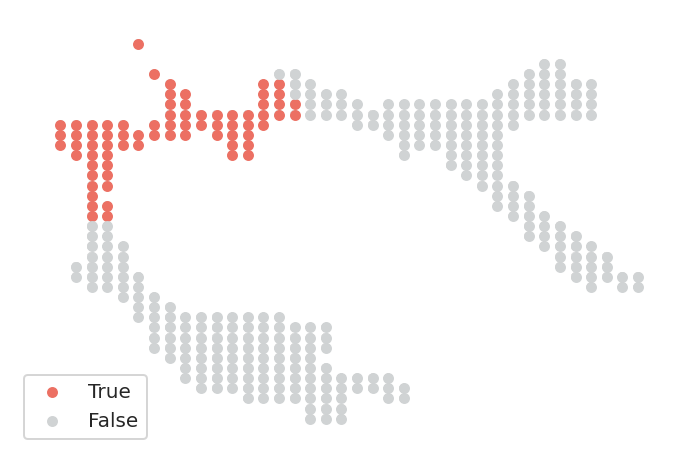

In [9]:
dev.plot_selected_pseudotime_on_grid(pseudotime_selected=[0, 1, 2])

## You can also get gene list as a dataframe as follows.

In [10]:
ps = helper.calculate_negative_ps_p_value(misc="Whole_cells")

In [11]:
ps

,gene,ps_sum
0,E2f4,2.413362
1,Zbtb7a,2.122534
2,Ybx1,1.773209
3,Smarcc1,1.721975
4,Smarca5,1.345598
...,...,...
85,Tcf7,0.003968
86,Sox13,0.003499
87,Batf3,0.003168
88,Stat4,0.002576


In [12]:
## Make plot like fig1 f

ps_me = helper.calculate_negative_ps_p_value(misc="Lineage_ME")
ps_gm = helper.calculate_negative_ps_p_value(misc="Lineage_GM")

ps_me.ps_sum = np.log1p(ps_me.ps_sum) # Log transform
ps_gm.ps_sum = np.log1p(ps_gm.ps_sum) # Log transform

ps_me = ps_me.rename(columns={"ps_sum": "ps_sum_me"})
ps_gm = ps_gm.rename(columns={"ps_sum": "ps_sum_gm"})

ps_merged = pd.merge(ps_me, ps_gm, on="gene")

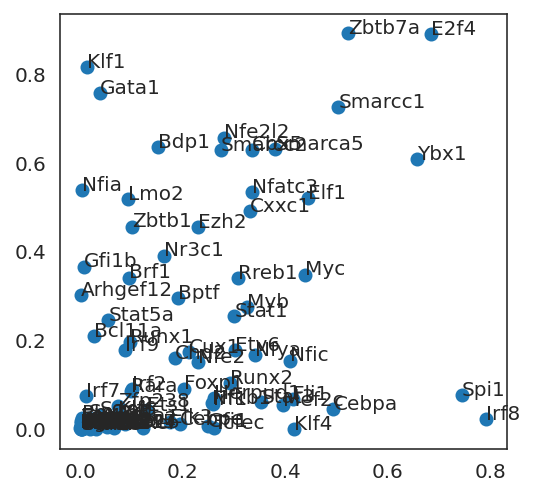

In [13]:
fig, ax = plt.subplots(figsize=[4, 4])
ax.scatter(ps_merged.ps_sum_gm, ps_merged.ps_sum_me)
for idx, (gene, y, x) in ps_merged.iterrows():
    ax.text(s=gene, x=x, y=y)